In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
df = pd.read_csv('Reviews.csv')
df = df[:10000]


In [216]:
df_sort = df.groupby(['UserId', 'ProfileName'])
df_mean = df_sort.mean()['Score']
df_count = df_sort.size()
df_dataframe = pd.DataFrame(columns=['Score count', 'Score mean'])
df_dataframe['Score count'] = df_count
df_dataframe['Score mean'] = df_mean
df_dataframe.sort_values(by=['Score count'], ascending=False, inplace=True)
df_dataframe.head(10)

,,Score count,Score mean
UserId,ProfileName,,
A1Z54EM24Y40LL,c2,17,3.882353
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
A35R32TA60XD57,M. Torma,9,4.111111
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
A3NHUQ33CFH3VM,Citizen John,7,3.142857
A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
A26NFIQ7KWI8Y7,kt rose,6,2.666667


<BarContainer object of 5 artists>

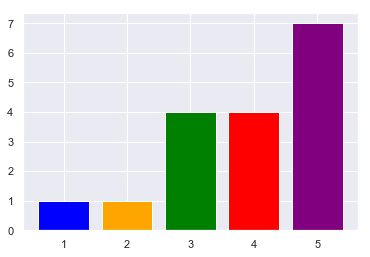

In [217]:
df_series = df.loc[df['ProfileName']=='c2', 'Score']
number = []
for element in df_series:
    if element not in number:
        number.append(element)
#arr = np.array([0,0,0,0,0])
arr = []
for i in range(len(number)):
    arr.append(0)
key = []
for element in df_series:
    arr[element-1] += 1
length = len(arr)
arr.sort()
for i in range(length):
    key.append(i+1)
plt.bar(key,arr,color=['blue', 'orange', 'green', 'red', 'purple'])

In [218]:
from datetime import date
df_passTime = df['Time']
df_time = df_passTime/60/60/24/365.24+1970
df_time = df_time.astype(int)
df1 = pd.DataFrame(data=df_time, columns=['Time'])
df2 = df1.groupby(['Time'])
df2.size()

Time
2000       2
2004      20
2005      28
2006     122
2007     370
2008     508
2009    1193
2010    1621
2011    2900
2012    3236
dtype: int64

<BarContainer object of 10 artists>

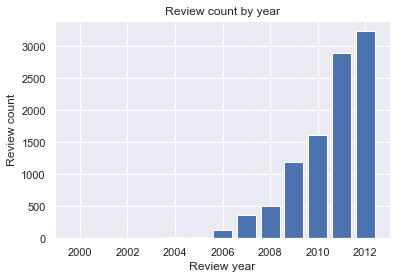

In [219]:
plt.xlabel('Review year')
plt.ylabel('Review count')
plt.title('Review count by year')
plt.bar(df2.sum().index,df2.size())

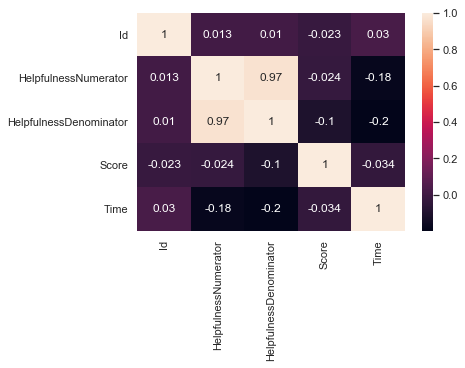

In [220]:
df_features = df.loc[:, ['Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']]
import seaborn as sns
sns.set()
sns.heatmap(df_features.corr(), annot=True)

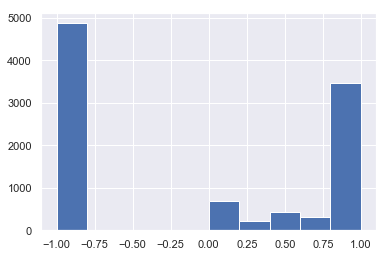

In [221]:
df_filter = df.loc[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]
Ratio = df_filter['HelpfulnessNumerator'] / df_filter['HelpfulnessDenominator']
plt.hist(Ratio.fillna(-1));
#plt.hist(Ratio);